# Power Circuit Theory, Lab 1, Spring 2018
## Author: Alexander Hiller (11850637)



## Part 1: Single Phase RC Circuit

### RC Circuit: Data Aggregation

In [52]:
import pandas as pd
from math import atan, pi, cos, sin
import matplotlib.pyplot as plt

df_rc = pd.DataFrame({
    '|$V_r$|':  [0,     10,    20,    30,    40,    50,    60,    70,    80,    90,    100,   110], 
    '|$V_c$|':  [120.9, 120.1, 119.1, 116.6, 114.4, 110.5, 107.7, 102.3, 95.1,  86.8,  73.8,  59.5], 
    '|$I_p$|':  [0.764, 0.748, 0.732, 0.716, 0.698, 0.684, 0.664, 0.628, 0.580, 0.534, 0.458, 0.360], 
    })

# Calculate resistance
df_rc["$R$"] = df_rc['|$V_r$|']/df_rc['|$I_p$|']

# Calculate phase angle of V_r
phi = []
for i, el in enumerate(df_rc["$R$"]):
    const = pi*(10**6)/(180*50*20)
    if (df_rc["$R$"][i] != 0):
        arg = const*1/(df_rc["$R$"][i])
        phi.append(atan(arg))
    else:
        phi.append(pi/2)

df_rc["$\phi$ (radians)"] = pih
        
# Convert back to degrees
for i, el in enumerate(phi):
    phi[i] = el*180/pi

df_rc["$\phi$ (degrees)"] =  phi

# Round values to three decimal places
df_rc.round(3)


,|$V_r$|,|$V_c$|,|$I_p$|,$R$,$\phi$ (radians),$\phi$ (degrees)
0,0,120.9,0.764,0.000,1.571,90.000
1,10,120.1,0.748,13.369,0.917,52.548
2,20,119.1,0.732,27.322,0.568,32.570
3,30,116.6,0.716,41.899,0.395,22.614
4,40,114.4,0.698,57.307,0.296,16.939
5,50,110.5,0.684,73.099,0.234,13.429
6,60,107.7,0.664,90.361,0.191,10.932
7,70,102.3,0.628,111.465,0.155,8.899
8,80,95.1,0.580,137.931,0.126,7.212
9,90,86.8,0.534,168.539,0.103,5.912


### Loci of RC Circuit

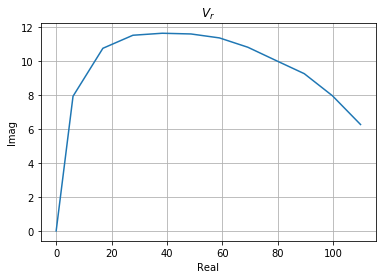

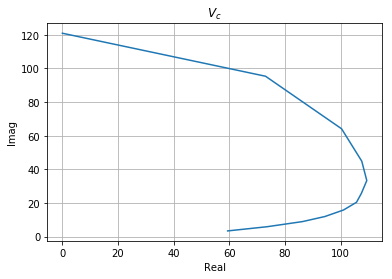

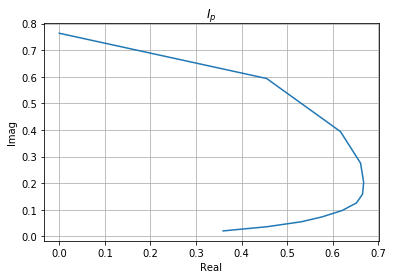

In [77]:
# Loci of V_r
v_r_real = []
v_r_imag = []
for i, el in enumerate(df_rc["|$V_r$|"]):
    v_r_real.append( df_rc["|$V_r$|"][i]*cos(df_rc["$\phi$ (radians)"][i]))
    v_r_imag.append( df_rc["|$V_r$|"][i]*sin(df_rc["$\phi$ (radians)"][i]))

# Loci of V_c
v_c_real = []
v_c_imag = []
for i, el in enumerate(df_rc["|$V_c$|"]):
    v_c_real.append( df_rc["|$V_c$|"][i]*cos(df_rc["$\phi$ (radians)"][i]))
    v_c_imag.append( df_rc["|$V_c$|"][i]*sin(df_rc["$\phi$ (radians)"][i]))

# Loci of I
i_real = []
i_imag = []
for i, el in enumerate(df_rc["|$I_p$|"]):
    i_real.append( df_rc["|$I_p$|"][i]*cos(df_rc["$\phi$ (radians)"][i]))
    i_imag.append( df_rc["|$I_p$|"][i]*sin(df_rc["$\phi$ (radians)"][i]))

plt.figure(1)
plt.plot(v_r_real, v_r_imag)
plt.grid()
plt.title("$V_r$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.show()

plt.figure(2)
plt.plot(v_c_real, v_c_imag)
plt.grid()
plt.title("$V_c$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.show()

plt.figure(3)
plt.plot(i_real, i_imag)
plt.grid()
plt.title("$I_p$")
# plt.axis([0, max(v_r_real), 0, max(v_r_real)])
plt.xlabel("Real")
plt.ylabel("Imag")
plt.show()

## Part 2: Single Phase RL Circuit

### RL Circuit: Data Aggregation

In [44]:
import pandas as pd
df_rl = pd.DataFrame({
    '$ |{V_r}| $':          [0,     10,    20,    30,    40,    50,    60,    70,    80   ], 
    '|$V_{s , \ rms}$|':    [120.9, 121.1, 121.1, 120.9, 120.9, 121.2, 121.3, 121.4, 121.4],
    '|$I_p$| (Wattmeter)':  [0.94,  0.90,  0.85,  0.78,  0.73,  0.66,  0.58,  0.54,  0.45 ],
    '|$I_p$| (Variac)':     [0.938, 0.892, 0.820, 0.766, 0.690, 0.618, 0.544, 0.460, 0.376],
    '|$V_L$|':              [121.1, 114.1, 106.1, 97.8,  88.8,  79.7,  69.9,  59.7,  49.1 ],
    'Measured $P$ (watts)': [77,    79,    77,    74,    70,    65,    58,    53,    46   ],
    'Measured $S$ (VA)':    [114,   111,   103,   95,    87,    81,    72,    65,    55   ],
    'Measured $Q$ (VAR)':   [84,    78,    70,    58,    54,    48,    40,    36,    33   ],
    'Measured $pf$':        [0.681, 0.709, 0.750, 0.781, 0.784, 0.810, 0.845, 0.841, 0.821],
    })

df_rl


,$ |{V_r}| $,"|$V_{s , \ rms}$|",|$I_p$| (Wattmeter),|$I_p$| (Variac),|$V_L$|,Measured $P$ (watts),Measured $S$ (VA),Measured $Q$ (VAR),Measured $pf$
0,0,120.9,0.94,0.938,121.1,77,114,84,0.681
1,10,121.1,0.90,0.892,114.1,79,111,78,0.709
2,20,121.1,0.85,0.820,106.1,77,103,70,0.750
3,30,120.9,0.78,0.766,97.8,74,95,58,0.781
4,40,120.9,0.73,0.690,88.8,70,87,54,0.784
5,50,121.2,0.66,0.618,79.7,65,81,48,0.810
6,60,121.3,0.58,0.544,69.9,58,72,40,0.845
7,70,121.4,0.54,0.460,59.7,53,65,36,0.841
8,80,121.4,0.45,0.376,49.1,46,55,33,0.821


## Part 3: Single Phase RLC Circuit

In [34]:
import pandas as pd
df_rlc = pd.DataFrame({
    '$V_R$':                            [14.3,  28.3,  33.7,  44.8,  84.5,  102.5, 109.9, 114.6, 116.6, 119.2], 
    '$V_{s, \ rms}$ (Wattmeter)':       [121.6, 121.9, 121.7, 121.0, 121.4, 121.0, 120.8, 121.0, 121.4, 121.4],
    '$V_{s, \ rms}$ (Variac)':          [120.6, 121.3, 120.7, 120.3, 120.3, 120.1, 120.3, 120.7, 120.9, 120.7],
    '$I_p$ (Wattmeter)':                [0.96,  1.88,  1.11,  1.16,  1.35,  1.35,  1.34,  1.30,  1.28,  1.23 ],
    '$I_p$ (Variac)':                   [0.934, 1.024, 1.044, 1.103, 1.244, 1.226, 1.210, 1.160, 1.144, 1.096],
    '$I_R$':                            [1.130, 1.103, 1.086, 1.046, 0.83,  0.63,  0.524, 0.429, 0.379, 0.293],
    'Measured $P$ (watts)':             [99,    115,   122,   132,   160,   155,   151,   143,   136,   130  ],
    'Measured $Q$ (VAR)':               [-64,   -60,   -58,   -55,   31,    47,    55,    67,    70,    78   ],
    'Measured $pf$':                    [0.850, 0.885, 0.897, 0.930, 0.987, 0.950, 0.937, 0.905, 0.872, 0.85 ],
    })

# Complex frequency caluclation
# df['Calculated $S$ (VA) '] =

df_rlc

,$V_R$,"$V_{s, \ rms}$ (Wattmeter)","$V_{s, \ rms}$ (Variac)",$I_p$ (Wattmeter),$I_p$ (Variac),$I_R$,Measured $P$ (watts),Measured $Q$ (VAR),Measured $pf$
0,14.3,121.6,120.6,0.96,0.934,1.130,99,-64,0.850
1,28.3,121.9,121.3,1.88,1.024,1.103,115,-60,0.885
2,33.7,121.7,120.7,1.11,1.044,1.086,122,-58,0.897
3,44.8,121.0,120.3,1.16,1.103,1.046,132,-55,0.930
4,84.5,121.4,120.3,1.35,1.244,0.830,160,31,0.987
5,102.5,121.0,120.1,1.35,1.226,0.630,155,47,0.950
6,109.9,120.8,120.3,1.34,1.210,0.524,151,55,0.937
7,114.6,121.0,120.7,1.30,1.160,0.429,143,67,0.905
8,116.6,121.4,120.9,1.28,1.144,0.379,136,70,0.872
9,119.2,121.4,120.7,1.23,1.096,0.293,130,78,0.850
